<a href="https://colab.research.google.com/github/jiiwon129/ESAA/blob/main/YB_5_30_%EC%84%B8%EC%85%98_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **kMeans 알고리즘을 적용하여 확인적 군집분석을 수행하시오.**
>변수 설명 ) tot_price : 총구매액, buy_count : 구매횟수,
                   visit_count : 매장방문횟수, avg_price : 평균구매액

In [1]:
#필요한 모듈 불러오기
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

## 1) 데이터 불러오기 및 탐색

In [2]:
sales = pd.read_csv("product_sales.csv")
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tot_price    150 non-null    float64
 1   visit_count  150 non-null    float64
 2   buy_count    150 non-null    float64
 3   avg_price    150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [3]:
print(sales.shape)
print(type(sales))

(150, 4)
<class 'pandas.core.frame.DataFrame'>


## 2) KMeans 를 이용하여 3개의 군집으로 군집화

2-1) KMeans 모델을 생성하세요. 군집은 3개로 군집화하세요.

In [6]:
#모델 생성
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3,init='k-means++',random_state=156)

2-2) 모델을 훈련하고 예측치 생성하고 이 결과를 pred라는 변수에 저장하세요.

In [7]:
kmeans.fit(sales)
pred=kmeans.predict(sales)

2-3) 원형 데이터(scale)에 예측치(변수명:cluster)를 추가하세요.

In [8]:
sales['cluster']=pred

## 3) 군집화 시각화
: 전체 데이터를 2차원으로 축소한 뒤 시각화하세요.

3-1) cluster 변수를 제외한 sales 데이터를 salesDF라는 이름으로 변수에 저장하세요.

In [9]:
salesDF=sales.drop('cluster',axis=1)

3-2) salesDF 데이터를 이용하여 2차원으로 차원축소 한 후 그 결과를 sales에 pca_x, pca_y 이름으로 저장하세요.

In [12]:
from sklearn.decomposition import PCA

#차원 축소 한 후 변형된 값 임의의 변수에 저장
pca=PCA(n_components=2)
sales_pca=pca.fit_transform(salesDF)

#sales에 'pca_x', 'pca_y' 이름으로 열 만들어 저장
sales['pca_x']=sales_pca[:,0]
sales['pca_y']=sales_pca[:,1]

3-3) pca_x를 x축, pca_y를 y축으로 하여 산점도를 그리세요. 색으로 각 점이 군집에 따라 구분되도록 하세요. (단, 각 군집별로 마커 모양 구분하지 않고 오직 색으로만 구분합니다.)

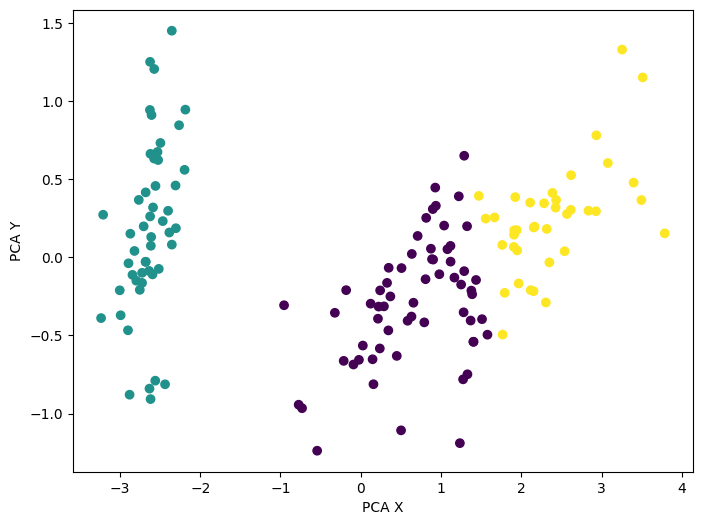

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(sales['pca_x'], sales['pca_y'], c=sales['cluster'])
plt.xlabel('PCA X')
plt.ylabel('PCA Y')
plt.show()

## 4) 군집평가: 실루엣 계수 구하기

In [17]:
#시각화를 위하여 사용했던 차원 축소 관련 계수 삭제
sales=sales.drop(['pca_x','pca_y'], axis=1)

#cluster 행을 제외한 순수 데이터 sales_data로 저장
sales_data=sales.drop('cluster', axis=1)

4-1) sales의 모든 데이터에 실루엣 계수를 구하고 실루엣 계수 칼럼을 추가하세요.

In [19]:
#sales의 모든 데이터에 실루엣 계수 구하기
from sklearn.metrics import silhouette_samples

samples=silhouette_samples(sales_data, sales['cluster'])

#sales에 실루엣 계수 칼럼 추가
sales['silhouette']=samples

In [21]:
sales.head()

,tot_price,visit_count,buy_count,avg_price,cluster,silhouette
0,5.0,0.2,3.0,1.6,1,0.791129
1,5.0,0.4,3.4,1.6,1,0.803393
2,5.2,0.2,3.5,1.5,1,0.807454
3,5.2,0.2,3.0,1.4,1,0.788805
4,4.7,0.2,3.2,1.6,1,0.800702


4-2) 모든 데이터의 평균 실루엣 계수를 구하세요.

In [20]:
#모든 데이터의 평균 실루엣 계수 값을 구하기
from sklearn.metrics import silhouette_score

average_score=silhouette_score(sales_data,sales['cluster'])
print(average_score)

0.538044239952023


4-3) 군집별 평균 실루엣 계수를 구하세요.

In [22]:
#군집별 평균 실루엣 계수 구하기
cluster_average_score=sales.groupby('cluster')['silhouette'].mean()
print(cluster_average_score)

cluster
0    0.416528
1    0.755123
2    0.450677
Name: silhouette, dtype: float64
